In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from project.ranker.ranker import RankingPredictor
from project.ranker.ranker import RandomRankingPredictor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RepeatedKFold
from project.feature_selection.feature_selector import FeatureSelection
import numpy as np




### Baseline Rankers

In [4]:
rr = RandomRankingPredictor(rank_size=8)
rp = Pipeline([
    ('scale', StandardScaler()),
    ('estimator', RankingPredictor("ma_100", n_neighbors=15)),
])


In [17]:
df_mf, df_rank, _, df_fold_scores = rp.named_steps['estimator'].get_data()

### Metrics usage sample

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, y_scores_train, y_scores_test = train_test_split(df_mf.values,
                                                                                   df_rank.values,
                                                                                   df_fold_scores.values)

In [30]:
y_pred = rr.predict(y_test)

In [31]:
from project.utils.metrics import evaluate_metric

In [32]:
# Spearman
evaluate_metric("spearman", y_test, y_pred)

0.19841269841269846

In [33]:
# AU Acc Loss Curve
# y_scores_test en vez de y_test
evaluate_metric("acc_loss", y_scores_test, y_pred)

0.18233672486517322

In [15]:
import warnings
warnings.simplefilter('ignore')

In [3]:
from project.ranker.ranker import RankingPredictor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [164]:
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('estimator', RankingPredictor("ma_100", n_neighbors=15)),
])

In [167]:
df_mf, df_rank, df_scores, df_fold_scores = pipeline.named_steps['estimator'].get_data()

In [168]:
df_mf.head()

,X_correlation_max,X_correlation_mean,X_correlation_min,X_covariance_max,X_covariance_mean,X_covariance_min,X_exp_var_max,X_exp_var_n_t80_cumsum,X_kurtosis_max,X_kurtosis_mean,...,X_stand_dev_min,X_std_covariance_max,X_std_covariance_mean,X_std_covariance_min,X_std_exp_var_max,X_var_coef_max,X_var_coef_mean,X_var_coef_min,y_norm_class_entropy_none,y_num_classes_none
dataset,,,,,,,,,,,,,,,,,,,,,
dataset_prostate_singh,0.994905,0.001368,-0.989840,6.501921e+06,29.654376,-1.662059e+06,0.538233,3,96.809515,3.634957,...,45.069954,0.994905,0.001368,-0.989840,0.635789,24.644940,0.968532,0.393882,0.999723,2
dataset_glioma_phillips,0.993589,0.026853,-0.690733,4.323435e+08,245013.502247,-6.592495e+07,0.311808,16,94.998000,6.624304,...,849.046524,0.993589,0.026853,-0.690733,0.144017,6.143025,0.497883,0.196919,0.795040,2
dataset_leukemia_armstrong,0.994280,0.084879,-0.916524,1.154806e+08,556524.637475,-7.348629e+07,0.249095,19,64.783987,3.472936,...,1480.763026,0.994280,0.084879,-0.916524,0.241996,2.250262,0.511498,0.239257,0.991532,3
dataset_breast_sotiriou,0.997310,0.703431,-0.803858,6.244864e+00,1.451080,-5.063628e+00,0.721969,3,10.362369,-0.156562,...,1.308462,0.997310,0.703431,-0.803858,0.745195,0.389483,0.202296,0.182322,0.993717,3
dataset_lymphoma_dave_2,0.985847,0.019387,-0.739594,5.893252e+00,0.027503,-3.396945e+00,0.124228,93,35.139636,1.273938,...,0.610939,0.985847,0.019387,-0.739594,0.140919,0.525447,0.158073,0.086560,0.882052,4


In [169]:
df_rank.head()

,minmax_chi_square_linearSVC,minmax_chi_square_naiveBayes,minmax_fisher_linearSVC,minmax_fisher_naiveBayes,minmax_random_forest_linearSVC,minmax_random_forest_naiveBayes,minmax_reliefF_linearSVC,minmax_reliefF_naiveBayes
dataset,,,,,,,,
dataset_glioma_rickman,7,1,6,2,4,3,8,5
dataset_ovarian_li_and_campbell,1,3,4,7,6,8,2,5
dataset_breast_gruvberger,3,7,1,5,4,8,2,6
dataset_mixed_chowdary,1,5,4,8,2,7,3,6
dataset_prostate_tomlins,2,7,3,8,1,6,4,5


In [420]:
df_rank.to_csv("ranking_8.csv")

In [170]:
df_scores.head()

,minmax_chi_square_linearSVC,minmax_chi_square_naiveBayes,minmax_fisher_linearSVC,minmax_fisher_naiveBayes,minmax_random_forest_linearSVC,minmax_random_forest_naiveBayes,minmax_reliefF_linearSVC,minmax_reliefF_naiveBayes
dataset,,,,,,,,
dataset_glioma_rickman,0.813054,0.846645,0.816290,0.843026,0.839579,0.842965,0.799187,0.839370
dataset_ovarian_li_and_campbell,0.947610,0.937770,0.930919,0.922591,0.925821,0.911032,0.943474,0.930098
dataset_breast_gruvberger,0.962926,0.943557,0.964038,0.944138,0.962223,0.942976,0.964038,0.944138
dataset_mixed_chowdary,0.976271,0.967996,0.969406,0.961720,0.975751,0.964084,0.970813,0.966064
dataset_prostate_tomlins,0.817462,0.746433,0.807649,0.720340,0.820034,0.755600,0.805604,0.760474


In [171]:
df_fold_scores.head()

,dataset,minmax_chi_square_linearSVC,minmax_chi_square_naiveBayes,minmax_fisher_linearSVC,minmax_fisher_naiveBayes,minmax_random_forest_linearSVC,minmax_random_forest_naiveBayes,minmax_reliefF_linearSVC,minmax_reliefF_naiveBayes
0,dataset_glioma_rickman,fold 0 1.000000 1 0.866025 2 1....,fold 0 1.000000 1 0.866025 2 1....,fold 0 0.894427 1 0.866025 2 1....,fold 0 0.894427 1 0.866025 2 1....,fold 0 0.894427 1 1.000000 2 1....,fold 0 1.000000 1 1.000000 2 1....,fold 0 0.866025 1 0.750000 2 1....,fold 0 0.866025 1 0.866025 2 0....
1,dataset_ovarian_li_and_campbell,fold 0 1.000000 1 1.000000 2 1....,fold 0 1.000000 1 1.000000 2 1....,fold 0 0.894427 1 1.000000 2 1....,fold 0 1.000000 1 1.000000 2 1....,fold 0 0.894427 1 1.000000 2 1....,fold 0 1.000000 1 1.000000 2 1....,fold 0 0.894427 1 1.000000 2 1....,fold 0 1.000000 1 1.000000 2 1....
2,dataset_breast_gruvberger,fold 0 1.000000 1 1.000000 2 1....,fold 0 1.000000 1 0.912871 2 1....,fold 0 1.000000 1 1.000000 2 1....,fold 0 1.000000 1 0.912871 2 1....,fold 0 1.000000 1 0.912871 2 1....,fold 0 1.000000 1 0.912871 2 1....,fold 0 1.000000 1 1.000000 2 1....,fold 0 1.000000 1 0.912871 2 1....
3,dataset_mixed_chowdary,fold 0 1.000000 1 0.942809 2 0....,fold 0 1.000000 1 0.942809 2 0....,fold 0 1.000000 1 0.942809 2 0....,fold 0 1.000000 1 0.905822 2 0....,fold 0 1.000000 1 0.942809 2 1....,fold 0 1.000000 1 0.881917 2 0....,fold 0 1.000000 1 0.942809 2 0....,fold 0 1.000000 1 0.942809 2 0....
4,dataset_prostate_tomlins,fold 0 0.930605 1 0.773055 2 0....,fold 0 0.930605 1 0.731110 2 0....,fold 0 1.000000 1 0.759836 2 0....,fold 0 1.000000 1 0.481098 2 0....,fold 0 0.962195 1 0.707107 2 0....,fold 0 0.962195 1 0.773055 2 0....,fold 0 0.809107 1 0.809107 2 0....,fold 0 0.840896 1 0.707107 2 0....


In [143]:
data = []
for fsr in fsrc:
    fsr_data = fsr.resultsToDataFrame()
    group = fsr_data.groupby(['pipeline', 'fold']).max().T
    
    pipelines = group.columns.levels[0]
    scores = {}
    for pipeline in pipelines:
        scores[pipeline] = group[pipeline].loc['score']
        
    data.append({
        'dataset': fsr.dataset_id,
        **scores,
    })
    
foo = pd.DataFrame(data)

In [9]:
X = df_mf.values

In [10]:
y = df_rank.values

In [11]:
y_scores = df_scores.values

In [175]:
df_fold_scores.set_index('dataset', inplace=True)

In [176]:
y_fold_scores = df_fold_scores.values

### Evaluacion

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RepeatedKFold
from project.feature_selection.feature_selector import FeatureSelection
import numpy as np


In [30]:
scores = cross_val_score(pipeline, X, y, scoring='mean_squared_error', cv=RepeatedKFold(10, 30))
np.mean(scores)

-2.564722222222222

In [42]:
mf_data.columns

Index(['X_correlation_max', 'X_correlation_mean', 'X_correlation_min',
       'X_covariance_max', 'X_covariance_mean', 'X_covariance_min',
       'X_exp_var_max', 'X_exp_var_n_t80_cumsum', 'X_kurtosis_max',
       'X_kurtosis_mean', 'X_kurtosis_min', 'X_minmax_covariance_max',
       'X_minmax_covariance_mean', 'X_minmax_covariance_min',
       'X_minmax_exp_var_max', 'X_minmax_stand_dev_max',
       'X_minmax_stand_dev_mean', 'X_minmax_stand_dev_min',
       'X_minmax_var_coef_max', 'X_minmax_var_coef_mean',
       'X_minmax_var_coef_min', 'X_num_attrs_none', 'X_num_obs_none',
       'X_ratio_obs_attrs_none', 'X_skewness_max', 'X_skewness_mean',
       'X_skewness_min', 'X_stand_dev_max', 'X_stand_dev_mean',
       'X_stand_dev_min', 'X_std_covariance_max', 'X_std_covariance_mean',
       'X_std_covariance_min', 'X_std_exp_var_max', 'X_var_coef_max',
       'X_var_coef_mean', 'X_var_coef_min', 'y_norm_class_entropy_none',
       'y_num_classes_none'],
      dtype='object')

In [98]:
mse = []
for i in range(2, 30):
    pipeline = Pipeline([
        ('scale', StandardScaler()),
        ('estimator', RankingPredictor("ma_100", n_neighbors=i)),
    ])
    scores = cross_val_score(pipeline, mf_data[['y_norm_class_entropy_none',
                                                'X_ratio_obs_attrs_none',
                                                #'X_correlation_mean',
                                                #'X_covariance_mean',
                                                #'X_stand_dev_mean',
                                                #'X_skewness_mean',
                                               ]],
                             fs_data, scoring='mean_squared_error', cv=RepeatedKFold(5, 100))
    mse.append({"k": i,
                "score": np.mean(scores)})    

In [99]:
import pandas as pd

In [100]:
mse = pd.DataFrame(mse)

In [101]:
import matplotlib.pyplot as plt

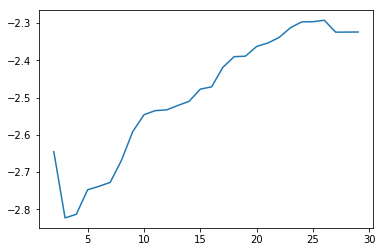

In [102]:
plt.plot(mse['k'], mse['score'])

# Random rank

In [19]:
from project.ranker.ranker import RandomRankingPredictor

rr = RandomRankingPredictor(rank_size=8)

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import numpy as np
scores = cross_val_score(rr, X, y, scoring='mean_squared_error', cv=RepeatedKFold(5,100))
np.mean(scores)

-10.560458333333333

# Metrics



In [179]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, y_scores_train, y_scores_test = train_test_split(X,
                                                                                   y,
                                                                                   y_fold_scores)


# Spearman rank correlation

In [22]:
from scipy.stats import spearmanr

In [23]:
y_pred = rr.predict(y_test)

In [24]:
spearmanr(y_test[0], y_pred[0])

SpearmanrResult(correlation=0.4047619047619048, pvalue=0.3198886412288162)

In [26]:
from project.utils.metrics import get_metric

In [27]:
scores = cross_val_score(rr, X, y, scoring=get_metric('spearman'), cv=RepeatedKFold(5,100))
np.mean(scores)

0.003150793650793651

In [86]:
scores = cross_val_score(pipeline, X[:, [0, 1, 12, 20]], y, scoring=get_metric('spearman'), cv=RepeatedKFold(5,100))
np.mean(scores)

0.0730277777777778

# Precision AUC

In [181]:
from sklearn.metrics import auc
import numpy as np
import matplotlib.pyplot as plt

In [411]:
y_pred = rr.predict(y_test)

In [412]:
from project.utils.metrics import evaluate_metric

In [413]:
evaluate_metric("acc_loss", y_scores_test, y_pred)

0.1138203807254155

In [185]:
precisions = y_scores_test[0]

In [192]:
precisions[np.argsort(y_pred[0])]

array([fold
0      0.635001
1      0.711805
2      0.730297
3      0.755229
4      0.774597
5      0.672022
6      0.763763
7      0.807373
8      0.623610
9      0.688530
10     0.720663
11     0.683130
12     0.745356
13     0.701849
14     0.816497
15     0.704822
16     0.748331
17     0.760117
18     0.688530
19     0.769800
20     0.782881
21     0.748331
22     0.772202
23     0.701849
24     0.638285
25     0.762001
26     0.541603
27     0.843274
28     0.701849
29     0.737865
         ...   
120    0.782881
121    0.648074
122    0.666667
123    0.755229
124    0.816497
125    0.842424
126    0.700000
127    0.795822
128    0.755229
129    0.737865
130    0.803219
131    0.816497
132    0.745356
133    0.750309
134    0.608581
135    0.700230
136    0.683130
137    0.737865
138    0.772202
139    0.843274
140    0.688617
141    0.816497
142    0.730297
143    0.836660
144    0.632456
145    0.720663
146    0.692820
147    0.750309
148    0.683130
149    0.788811
Name: score,

In [227]:
for p in precisions[np.argsort(y_pred[3])]:
    print(p.mean())

0.6407039381914964
0.7232815861424229
0.7322292406392147
0.6521891034285435
0.7266506402793084
0.5907441648584678
0.7419925746327939
0.5892267392455164


In [229]:
for p in precisions[np.argsort(y_test[4])]:
    print(p.mean())

0.5907441648584678
0.6407039381914964
0.5892267392455164
0.7266506402793084
0.7322292406392147
0.7419925746327939
0.7232815861424229
0.6521891034285435


In [243]:
df = pd.DataFrame()
for p in precisions[np.argsort(y_test[4])]:
    df = df.append(p)

In [249]:
precisions[np.argsort(y_test[4])][1].head()

fold
0    0.632456
1    0.600000
2    0.720082
3    0.680414
4    0.745356
Name: score, dtype: float64

In [264]:
pred_scores= pd.DataFrame()
for p in precisions[np.argsort(y_pred[0])]:
    pred_scores = pred_scores.append(p, ignore_index=True)

pred_scores = pred_scores.T

In [266]:
pred_scores.head()

,0,1,2,3,4,5,6,7
0,0.635001,0.700230,0.595683,0.622171,0.520546,0.590243,0.632456,0.556487
1,0.711805,0.734847,0.730297,0.707107,0.621825,0.611010,0.600000,0.678233
2,0.730297,0.737865,0.788811,0.714920,0.745356,0.720082,0.720082,0.788811
3,0.755229,0.745356,0.772202,0.567646,0.707107,0.471405,0.680414,0.714920
4,0.774597,0.750309,0.795822,0.693889,0.730297,0.638285,0.745356,0.769800


In [415]:
def precision_loss_2(y_pred, y_fold_scores, plot=False):
    pred_scores= pd.DataFrame()
    for p in y_fold_scores[np.argsort(y_pred)]:
        pred_scores = pred_scores.append(p, ignore_index=True)
        
    pred_scores = pred_scores.T
    
    max_scores = pred_scores.max(axis=1)
    
    loss_scores = abs(pred_scores.sub(max_scores, axis=0)).cummin(axis=1)
    
    n_fs = loss_scores.shape[1]
    loss_auc = []
    for i in loss_scores.iterrows():        
        loss_auc.append(auc(i[1].keys(), i[1].values))
    
    return np.mean(loss_auc)
    

In [416]:
def precision_loss_metric_2(y_pred, y_fold_scores):    
    results = []
    for yt, ys in zip(y_pred, y_fold_scores):
        results.append(precision_loss_2(yt, ys))
        
    return np.mean(results)

In [417]:
precision_loss_2(y_pred[2], precisions)

0.1767945034437446

In [418]:
precision_loss_metric_2(y_pred, y_scores_test)

0.1138203807254155

In [387]:
loss[13]

0.23928621050758547

In [329]:
loss.shape

(150, 8)

In [303]:
def precision_loss(y_test, y_pred, y_test_scores, plot=False):
    test_scores = y_test_scores[np.argsort(y_test)]    
    pred_scores = y_test_scores[np.argsort(y_pred)]
    
    max_score = 0
    loss_curve = []
    for score in pred_scores:
        max_score = max(score, max_score)
        loss_curve.append(test_scores[0] - max_score)
    
    if plot:
        xs = np.linspace(0,3,10)
        ys = [test_scores[0] for x in xs]    
        plt.plot(pred_scores)
        plt.plot(xs, ys, 'r--')
        plt.title('prediction score')
        plt.show()

        plt.plot(loss_curve)
        plt.title('loss curve')

    return auc(np.linspace(0,3,4), loss_curve)
    

In [61]:
def precision_loss_metric(y_test, y_pred, y_test_scores):    
    results = []
    for yt, yp, ys in zip(y_test, y_pred, y_test_scores):
        results.append(precision_loss(yt, yp, ys))
        
    return np.mean(results)

In [62]:
precision_loss(y_test[0], y_pred[0], precisions)

0.0

### KNN Ranking evaluation

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RepeatedKFold
from project.feature_selection.feature_selector import FeatureSelection
import numpy as np
from project.utils.metrics import get_metric


In [25]:
scores = cross_val_score(pipeline, X, y, scoring='mean_squared_error', cv=RepeatedKFold(10, 30))
np.mean(scores)

-2.5655555555555556

In [46]:
scores = cross_val_score(pipeline, X, y, scoring=get_metric('spearman'), cv=RepeatedKFold(10, 100))
np.mean(scores)

-0.0209

In [48]:
from sklearn.model_selection import cross_val_predict

cross_val_predict(pipeline, X, y, cv=RepeatedKFold(10, 100))

ValueError: cross_val_predict only works for partitions

### Random Ranking evaluation

In [18]:
from project.ranker.ranker import RandomRankingPredictor

rr = RandomRankingPredictor(rank_size=4)

In [21]:
scores = cross_val_score(rr, X, y, scoring='mean_squared_error', cv=RepeatedKFold(10, 30))
np.mean(scores)

-2.4994444444444444

In [45]:
scores = cross_val_score(rr, X, y, scoring=get_metric('spearman'), cv=RepeatedKFold(10, 100))
np.mean(scores)

0.006866666666666666